# Load the Data

In [2]:
import pandas as pd

# Load the dataset with the correct delimiter
path = "C:\\IMPORTANT FILES\\PRODIGY INFOTECH\\bank.csv"
data = pd.read_csv(path, sep=';')
data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


# Preprocess the Data

In [3]:
# Encode categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Split the Data

In [5]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = data_encoded.drop('y_yes', axis=1)  # Drop the target column
y = data_encoded['y_yes']  # Target column

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Train the Decision Tree Classifier

In [6]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

# Evaluate the Model

In [7]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8695652173913043
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1205
           1       0.42      0.44      0.43       152

    accuracy                           0.87      1357
   macro avg       0.68      0.68      0.68      1357
weighted avg       0.87      0.87      0.87      1357

[[1113   92]
 [  85   67]]


# Visualize the Decision Tree

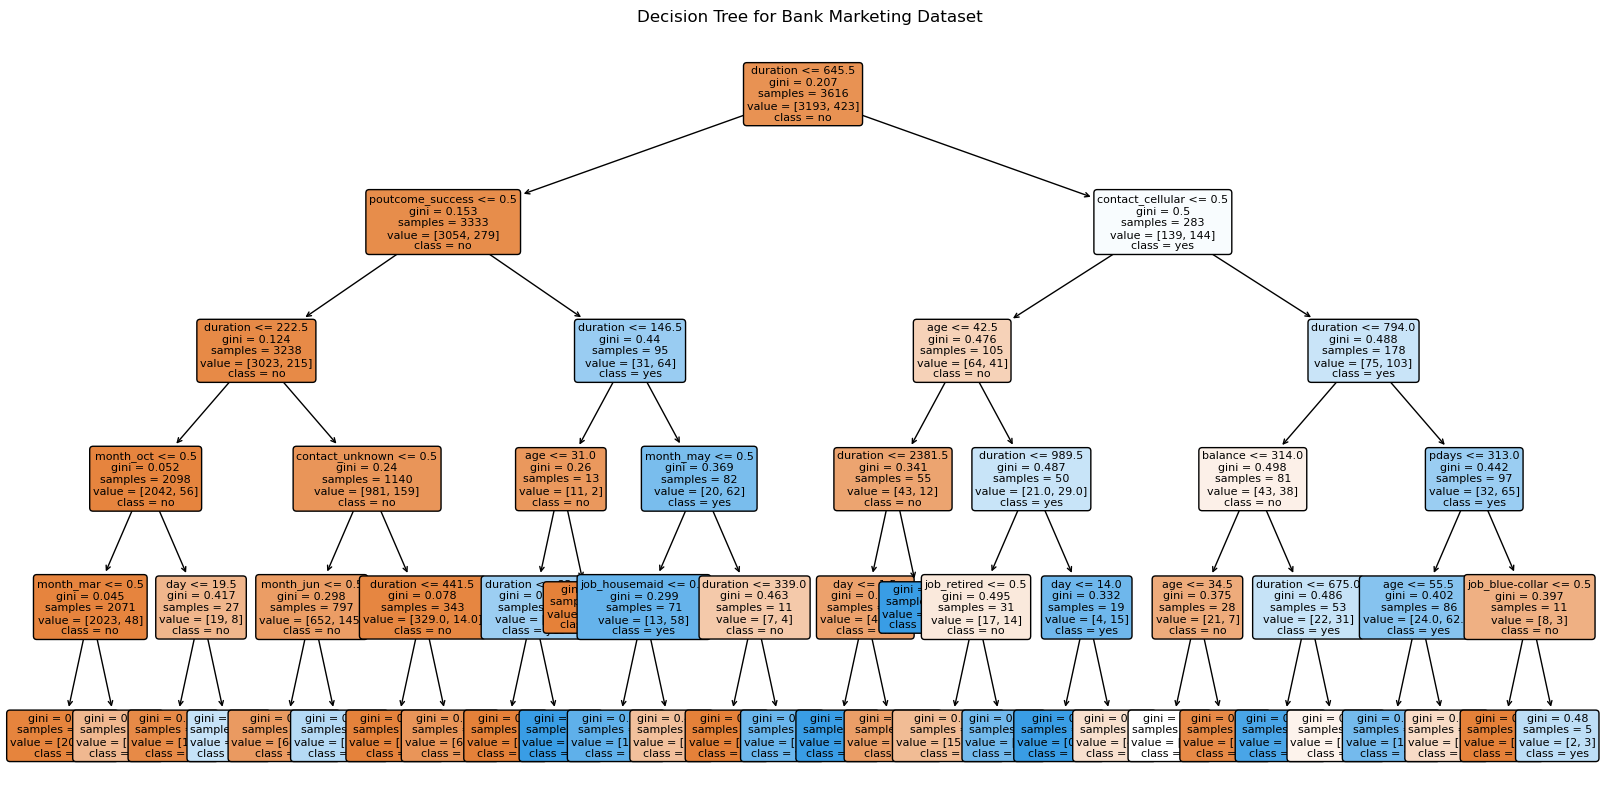

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Load the dataset
path = "C:\\IMPORTANT FILES\\PRODIGY INFOTECH\\bank.csv"
data = pd.read_csv(path, delimiter=';')

# Separate features (X) and target (y)
X = data.drop('y', axis=1)  # Features
y = data['y']  # Target variable

# One-hot encoding for categorical variables
X_encoded = pd.get_dummies(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42, max_depth=5)  # Adjust max_depth for clarity
clf.fit(X_train, y_train)

# Define class names for the target variable
class_names = ['no', 'yes']

# Define feature names (the encoded feature columns)
feature_names = X_encoded.columns

# Set up the plot
plt.figure(figsize=(20, 10))

# Plot the tree with detailed labels
tree.plot_tree(
    clf,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,  # Colors the nodes based on class
    rounded=True, # Rounded nodes for a better visual appearance
    proportion=False, # Displays the exact counts/proportions in each node
    fontsize=8     # Font size for better readability
)

# Add a title
plt.title('Decision Tree for Bank Marketing Dataset')
plt.show()
